In [1]:
import pandas as pd
import geopandas as gdp
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

In [2]:
df = pd.read_pickle("../pickles/utseus-cendus-shanghai-neighborhoods.pk")

In [3]:
df.to_csv("./convert_shanghai.csv")

In [4]:
df.head()

,NAME,TYPE,geometry
0,??,2,POLYGON Z ((121.4216787977396 30.6847124112995...
1,???,2,POLYGON Z ((121.4119888989075 30.6937387337238...
2,???,2,POLYGON Z ((121.4016307330431 30.7071734919907...
3,????,2,POLYGON Z ((121.3368669670694 30.7380603821550...
4,????,2,POLYGON Z ((121.2514316037695 30.7917653095429...


In [5]:
geometry = df['geometry']
crs = {'init': 'epsg:4479'}

In [6]:
gdf = gdp.GeoDataFrame(df, crs=crs, geometry=geometry)

In [7]:
gdf.plot(figsize=(8,15))

In [8]:
df_taxi = pd.read_pickle("../pickles/utseus-shanghai-taxi-speed-position.pk")

In [9]:
df_taxi.head()

,taxi_id,time,status,lon,lat,speed,geometry
0,24029,2015-04-11,0,121.421822,31.212080,19.6,POINT (121.4265311273298 31.2102277773033)
1,24029,2015-04-11,0,121.423275,31.212148,15.8,POINT (121.4279823397575 31.21029449657971)
2,24029,2015-04-11,0,121.424295,31.212597,11.5,POINT (121.4290010222642 31.21074273305947)
3,24029,2015-04-11,0,121.426872,31.215222,6.5,POINT (121.4315744665943 31.21336630745432)
4,24029,2015-04-11,0,121.427138,31.215365,6.7,POINT (121.4318400592804 31.21350908242947)


In [10]:
df_taxi_clean = df_taxi[(df_taxi['lon']>121.101157) & (df_taxi['lon']<121.804611) & 
                        (df_taxi['lat']>30.975) & (df_taxi['lat']<31.51)];

In [11]:
gdf_taxi = df_taxi_clean['geometry']

In [22]:
gdf_taxi = gdf_taxi[0:20000]
gdf_taxi.head()

0     POINT (121.4265311273298 31.2102277773033)
1    POINT (121.4279823397575 31.21029449657971)
2    POINT (121.4290010222642 31.21074273305947)
3    POINT (121.4315744665943 31.21336630745432)
4    POINT (121.4318400592804 31.21350908242947)
Name: geometry, dtype: object

In [23]:
print(type(gdf_taxi))

<class 'geopandas.geoseries.GeoSeries'>


In [13]:
len(gdf_taxi)

20000

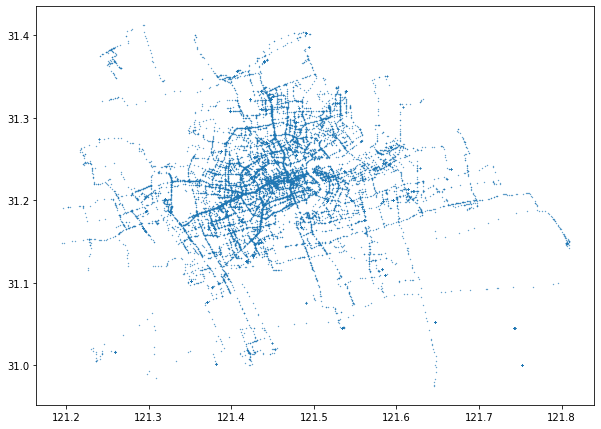

In [14]:
gdf_taxi.plot(markersize=0.1,figsize=(10,8));

In [15]:
df['nb_taxi'] = 0
df['nb_taxi'].head()

0    0
1    0
2    0
3    0
4    0
Name: nb_taxi, dtype: int64

In [ ]:
for j, taxi in gdf_taxi.items():    
    for i, area in df.iterrows():
        if taxi.within(area['geometry']):
            df.set_value(i,'nb_taxi', df.iloc[i]['nb_taxi']+1)

C:\Users\sebr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [ ]:
df.iloc[128]

In [ ]:
df.max()

In [ ]:
df.to_pickle("../pickles/savedDF_taxi_per_district.pkl")